In [16]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')

In [17]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
canna_data = pd.read_csv("../clean_data.csv")

In [19]:
canna_data.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


AttributeError: 'DataFrame' object has no attribute 'set_ylim'

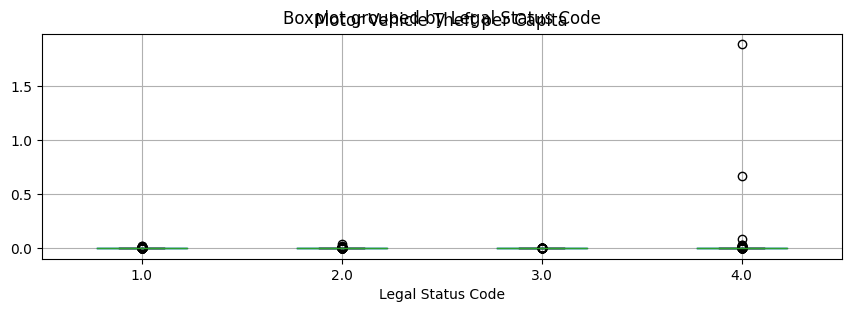

In [20]:
# Create a boxplot to compare means
canna_data.boxplot("Motor Vehicle Theft per Capita", by="Legal Status Code", figsize=(10, 3))
canna_data.set_ylim(0, 0.5)

In [21]:
# Extract individual groups
group1mvt = canna_data[canna_data["Legal Status Code"] == 1]["Motor Vehicle Theft per Capita"]
group2mvt = canna_data[canna_data["Legal Status Code"] == 2]["Motor Vehicle Theft per Capita"]
group3mvt = canna_data[canna_data["Legal Status Code"] == 3]["Motor Vehicle Theft per Capita"]
group4mvt = canna_data[canna_data["Legal Status Code"] == 4]["Motor Vehicle Theft per Capita"]

In [22]:
# Perform the ANOVA
stats.f_oneway(group1mvt, group2mvt, group3mvt, group4mvt)

F_onewayResult(statistic=3.0264688071918777, pvalue=0.028318907294644962)

In [23]:
groups = canna_data["Legal Status Code"]

In [24]:
data = canna_data["Motor Vehicle Theft per Capita"]

In [25]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(data, groups)

# Print the results
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0  -0.0004 0.9574 -0.0021 0.0014  False
   1.0    3.0  -0.0009 0.7996 -0.0034 0.0016  False
   1.0    4.0   0.0016 0.1304 -0.0003 0.0035  False
   2.0    3.0  -0.0005 0.9487 -0.0031  0.002  False
   2.0    4.0   0.0019  0.051    -0.0 0.0039  False
   3.0    4.0   0.0025 0.0747 -0.0002 0.0052  False
---------------------------------------------------


In [26]:
population1 = canna_data[canna_data["Legal Status Code"] == 1]["Motor Vehicle Theft per Capita"]
population1.mean()

0.0018318377922698697

In [27]:
# Calculate the population mean for stranger heights in Denver
population2 = canna_data[canna_data["Legal Status Code"] == 2]["Motor Vehicle Theft per Capita"]
population2.mean()

0.0014801365391698624

In [28]:
# Calculate the population mean for stranger heights in Denver
population3 = canna_data[canna_data["Legal Status Code"] == 3]["Motor Vehicle Theft per Capita"]
population3.mean()

0.0009356492618463782

In [29]:
population4 = canna_data[canna_data["Legal Status Code"] == 4]["Motor Vehicle Theft per Capita"]
population4.mean()

0.0034298265806984563

In [30]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population3, population4, equal_var=False)

Ttest_indResult(statistic=-2.184842725894986, pvalue=0.02903168468406078)